<a href="https://colab.research.google.com/github/ginttone/summary/blob/master/NLP/countvectorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 뉴스 관련단어 추천 서비스

## 데이터 가져오기

In [44]:
import pandas as pd

In [45]:
df = pd.read_csv('./drive/MyDrive/Multi_test_deeplearning/smtph_total.csv')
df.head(5)

,Title,Link,Description,Blogger Name,Blogger Link,Post Date,Post Contents
0,"갤럭시 Z 플립과 한 달, 접는 스마트폰의 가치만 남다",https://chitsol.com/entry/galaxy_z_flip_review/,반으로 접을 수 있는 갤럭시 Z 플립이 접지 않는 스마트폰과 얼마나 다른 경험인가를...,https://chitsol.com/,https://chitsol.com/,20210712,NaN
1,스마트폰 삼각대 추천 내돈내산 리뷰,https://blog.naver.com/kimhw1020?Redirect=Log&...,그래서 스마트폰 삼각대 추천 하는 제품을 구매하게 된 것 같아요. 2018년 4월 ...,진돗개 솜이랑 언니랑,https://blog.naver.com/kimhw1020,20210720,\n\n\n\n\n\n\n솜이언니 일상\n\n\n\n\n스마트폰 삼각대 추천 내돈내...
2,귀여운 스마트폰 거치대 + 아이폰 케이스(다이소 비교),https://blog.naver.com/logix200?Redirect=Log&l...,스마트폰 거치대 홀더 &quot;아이폰 케이스도 졸.귀.탱&quot; 안녕하세요. ...,옥희돌이 칩시크족,https://blog.naver.com/logix200,20210802,\n\n\n\n\n\n\n일반 수령기\n\n\n\n\n귀여운 스마트폰 거치대 + 아...
3,"베스틴 원패스 스마트폰 어플, 아이파크 공동 현관문 핸드폰 연동",https://blog.naver.com/july7th73?Redirect=Log&...,"요즘 신축 아파트들은 대부분 IoT 스마트 기기들을 이용한 출입시스템을 도입, 각종...",수연아빠의 야구장 출동 (개포맘모스),https://blog.naver.com/july7th73,20210816,\n\n\n\n\n\n\n파워리뷰즐기기\n\n\n\n\n베스틴 원패스 스마트폰 어플...
4,대전스마트폰복구 삭제나 고장도 걱정없이,https://blog.naver.com/jcy0207?Redirect=Log&lo...,바쁜 현대인들의 곁에서 어디서든 일상을 함께하는 스마트폰은 한순간도 뗄레야 뗄 수 ...,모아의 교육정보 모아모아,https://blog.naver.com/jcy0207,20210609,\n\n안녕하세요 모아입니다.바쁜 현대인들의 곁에서어디서든 일상을 함께하는 스마트폰...


In [46]:
df.columns

Index(['Title', 'Link', 'Description', 'Blogger Name', 'Blogger Link',
       'Post Date', 'Post Contents'],
      dtype='object')

In [47]:
posts = df['Title']+['Description']
type(posts),posts

(pandas.core.series.Series,
 0              갤럭시 Z 플립과 한 달, 접는 스마트폰의 가치만 남다Description
 1                         스마트폰 삼각대 추천 내돈내산 리뷰Description
 2              귀여운 스마트폰 거치대 + 아이폰 케이스(다이소 비교)Description
 3         베스틴 원패스 스마트폰 어플, 아이파크 공동 현관문 핸드폰 연동Description
 4                       대전스마트폰복구 삭제나 고장도 걱정없이Description
                              ...                        
 995    스마트폰의 &quot;배터리 수명&quot;을 걱정하지 않아도 좋은 이유Descri...
 996                  세상을 스마트폰 카메라로 검색하는 구글 렌즈Description
 997              스마트폰과 연동되는 장난감 로봇, 샤오미 로봇청소기Description
 998            KT 단독 보급형 스마트폰 갤럭시진 블랙 특징 사용후기Description
 999          화웨이 트리플카메라 스마트폰 P20프로, 카메라 스펙 분석Description
 Name: Title, Length: 1000, dtype: object)

## 단어로 쪼개기

In [ ]:
!python3 -m pip install konlpy

In [49]:
from konlpy.tag import Okt

In [50]:
okt = Okt()

In [51]:
stop_words = ['강,', '글,', '애', '미', '번', '은', '이', '것', '등', '더', '를', '좀', '즉', '인', '옹', '때', '만', '원', '이때', '개']

In [52]:
posts_noun = []
for post in posts:
  #print(okt.nouns(post))
  for noun in okt.nouns(post):
    posts_noun.append(noun)

len(posts_noun)

6083

In [ ]:
posts_noun

In [54]:
from collections import Counter

type(noun_cnt) 딕셔너리로 출력 됨

In [55]:
noun_cnt = Counter(posts_noun)
type(noun_cnt)

collections.Counter

In [ ]:
top_30_nouns = noun_cnt.most_common(30)
type(top_30_nouns),top_30_nouns

In [57]:
top_nouns_dict = dict(top_30_nouns)
type(top_nouns_dict)

dict

## Word cloud


In [58]:
from wordcloud import WordCloud

In [59]:
path = ''

In [60]:
nouns_wordcloud = WordCloud()

In [61]:
nouns_wordcloud.generate_from_frequencies(top_nouns_dict)

## Display

In [62]:
import matplotlib.pyplot as plt

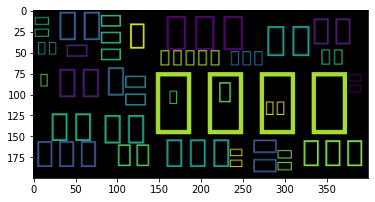

In [63]:
plt.imshow(nouns_wordcloud)

stopwords, fonts 사용 안한 것

## CountVectorizer(빈도수 사용)

In [64]:
from sklearn.feature_extraction.text import CountVectorizer 

In [65]:
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

In [66]:
countvectorizer  = CountVectorizer()

In [67]:
countvectorizer.fit_transform(corpus).toarray()

array([[0, 1, 0, 1, 0, 1, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 1, 0, 1, 0, 0]])

vocabulary_ 로 컬럼의 순서 확인

In [68]:
print(countvectorizer.vocabulary_)

{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


## Word2Vec
단어 리스트를 word2vec 함

In [69]:
from gensim.models import Word2Vec

In [70]:
word2vec= Word2Vec([posts_noun],min_count=1)

In [71]:
word2vec

궁금한 단어 넣으면 유사단어 가져옴(코사인 기준)

In [72]:
word2vec.wv.most_similar('삼성')

[('스마트폰', 0.9987649917602539),
 ('갤럭시', 0.9981738328933716),
 ('스펙', 0.998099684715271),
 ('강', 0.9980555772781372),
 ('위', 0.9980287551879883),
 ('방법', 0.9980186223983765),
 ('사용', 0.9979647397994995),
 ('강의', 0.9979081749916077),
 ('안드로이드', 0.9979023337364197),
 ('보급', 0.9978432059288025)]

In [73]:
word2vec